# Classificação de roupas

Nesse trabalho foi realizado a criação de uma rede neural convolucional para classificar imagens de roupas.

**Importação das bibliotecas**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

**Carregamento da base de dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist-test.csv', sep = ',')

**Visualização dos dados**

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

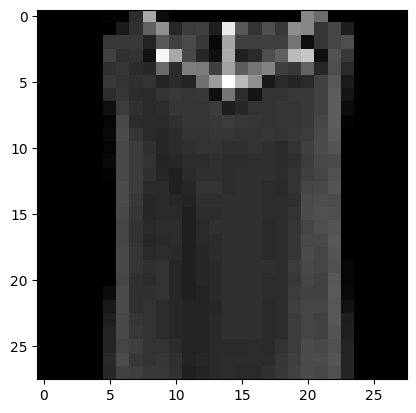

In [22]:
i = random.randint(1, 60000)
#plt.imshow(training[i, 1:].reshape((28,28)))
plt.imshow(training[i, 1:].reshape((28,28)), cmap = 'gray')

In [23]:
label = training[i,0]
label

6.0

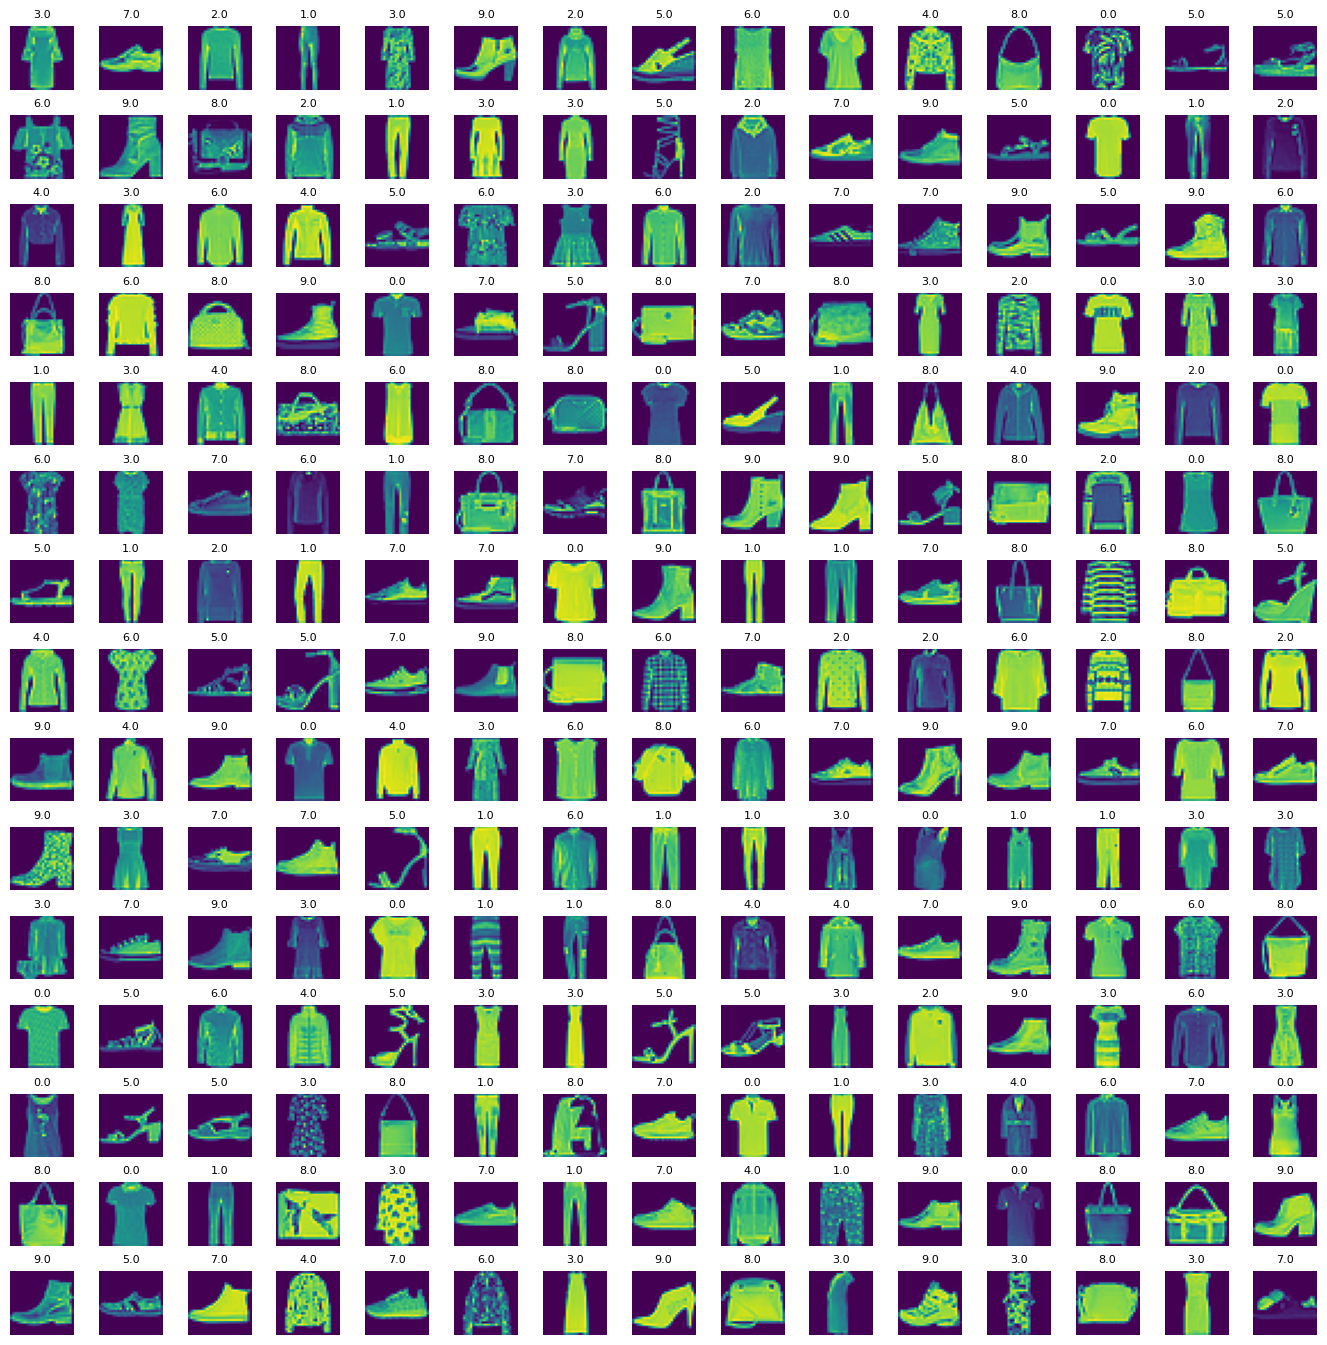

In [25]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index, 1:].reshape((28, 28)))
  axes[i].set_title(training[index, 0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


In [26]:
n_training

60000

**Tratamento da base de dados**

In [52]:
X_train = training[:, 1:] / 255
y_train = training[:, 0]

In [53]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [54]:
X_train.shape

(60000, 784)

In [55]:
y_train.shape

(60000,)

In [56]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [58]:
X_train.shape

(60000, 28, 28, 1)

In [59]:
X_test.shape

(10000, 28, 28, 1)

**Construção e treinamento do modelo**

In [60]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [63]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',
            metrics = ['accuracy'])

In [64]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)


epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 12s 11ms/step - loss: 0.8689 - accuracy: 0.6896
Epoch 2/150
118/118 [==============================] - 1s 10ms/step - loss: 0.5128 - accuracy: 0.8099
Epoch 3/150
118/118 [==============================] - 1s 10ms/step - loss: 0.4268 - accuracy: 0.8483
Epoch 4/150
118/118 [==============================] - 1s 10ms/step - loss: 0.3817 - accuracy: 0.8628
Epoch 5/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3508 - accuracy: 0.8744
Epoch 6/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3287 - accuracy: 0.8822
Epoch 7/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3158 - accuracy: 0.8871
Epoch 8/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3002 - accuracy: 0.8924
Epoch 9/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2856 - accuracy: 0.8972
Epoch 10/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2761 - a

**Avaliação do modelo**

In [65]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 1.4046 - accuracy: 0.9198


In [66]:
evaluation

[1.4045531749725342, 0.9197999835014343]

In [67]:
predict_x = cnn.predict(X_test)
predicted_classes = np.argmax(predict_x, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [68]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [69]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

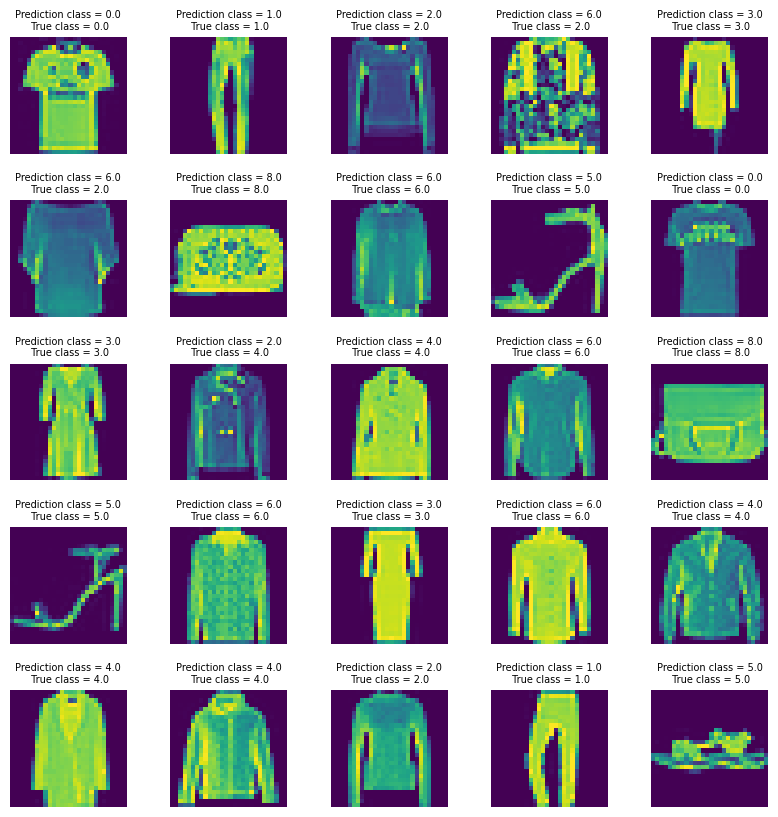

In [73]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10, 10))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape ((28, 28)))
  axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 7)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

<Axes: >

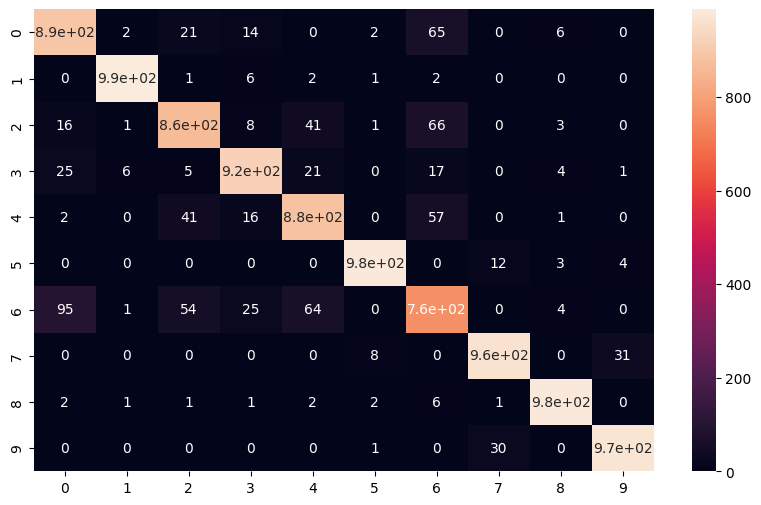

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True)

In [75]:
cm

array([[890,   2,  21,  14,   0,   2,  65,   0,   6,   0],
       [  0, 988,   1,   6,   2,   1,   2,   0,   0,   0],
       [ 16,   1, 864,   8,  41,   1,  66,   0,   3,   0],
       [ 25,   6,   5, 921,  21,   0,  17,   0,   4,   1],
       [  2,   0,  41,  16, 883,   0,  57,   0,   1,   0],
       [  0,   0,   0,   0,   0, 981,   0,  12,   3,   4],
       [ 95,   1,  54,  25,  64,   0, 757,   0,   4,   0],
       [  0,   0,   0,   0,   0,   8,   0, 961,   0,  31],
       [  2,   1,   1,   1,   2,   2,   6,   1, 984,   0],
       [  0,   0,   0,   0,   0,   1,   0,  30,   0, 969]])

In [76]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [77]:
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.89      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.93      0.92      0.93      1000
     Class 4       0.87      0.88      0.88      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.78      0.76      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

